In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sklearn as sk
import seaborn as sb
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.model_selection import train_test_split

In [2]:
ccdf= pd.read_excel(r'C:\Users\hp\Desktop\FINAL Project\mdata.xlsx')


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\hp\\Desktop\\FINAL Project\\mdata.xlsx'

In [ ]:
# data frame

In [ ]:
df=pd.DataFrame(ccdf)
df



In [6]:
# finding details about data frame
df.describe()


,Incoming Calls,Answered Calls,Abandoned Calls,Time,Unnamed: 5
count,103.000000,103.000000,103.000000,103.00000,0.0
mean,169.718447,162.368932,7.349515,3.36932,NaN
std,77.199819,74.915638,10.119588,1.47765,NaN
min,18.000000,17.000000,0.000000,0.02000,NaN
25%,139.000000,132.000000,2.000000,2.40000,NaN
50%,185.000000,174.000000,5.000000,3.10000,NaN
75%,216.500000,203.000000,8.500000,4.60000,NaN
max,385.000000,370.000000,90.000000,5.60000,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Incoming Calls   103 non-null    int64  
 1   Answered Calls   103 non-null    int64  
 2   Abandoned Calls  103 non-null    int64  
 3   Time             103 non-null    float64
 4   point            103 non-null    object 
 5   Unnamed: 5       0 non-null      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 5.0+ KB


In [8]:
df.loc[:]

,Incoming Calls,Answered Calls,Abandoned Calls,Time,point,Unnamed: 5
0,217,204,13,2.4,good,NaN
1,200,110,90,4.2,weak,NaN
2,216,198,18,5.3,good,NaN
3,155,145,10,5.2,good,NaN
4,37,27,10,2.0,weak,NaN
...,...,...,...,...,...,...
98,202,198,4,5.3,good,NaN
99,226,219,7,5.1,good,NaN
100,167,163,4,3.1,good,NaN
101,164,164,0,2.2,good,NaN


In [9]:
cleanup= {"point": {"weak": 0, "normal": 1 ,"good": 2 }}
df =df.replace(cleanup)
df


,Incoming Calls,Answered Calls,Abandoned Calls,Time,point,Unnamed: 5
0,217,204,13,2.4,2,NaN
1,200,110,90,4.2,0,NaN
2,216,198,18,5.3,2,NaN
3,155,145,10,5.2,2,NaN
4,37,27,10,2.0,0,NaN
...,...,...,...,...,...,...
98,202,198,4,5.3,2,NaN
99,226,219,7,5.1,2,NaN
100,167,163,4,3.1,2,NaN
101,164,164,0,2.2,2,NaN


In [10]:
a=df.drop('Unnamed: 5', axis=1)
a

,Incoming Calls,Answered Calls,Abandoned Calls,Time,point
0,217,204,13,2.4,2
1,200,110,90,4.2,0
2,216,198,18,5.3,2
3,155,145,10,5.2,2
4,37,27,10,2.0,0
...,...,...,...,...,...
98,202,198,4,5.3,2
99,226,219,7,5.1,2
100,167,163,4,3.1,2
101,164,164,0,2.2,2


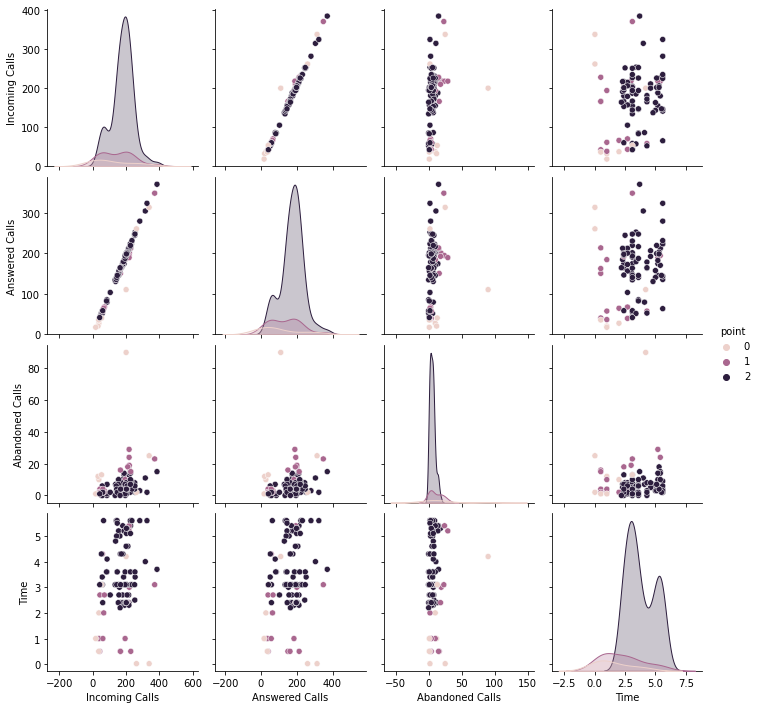

In [11]:
sb.pairplot(a , hue = "point")

In [12]:
X=a.iloc[:, 0:4]
Y=a.iloc[:,4]


In [13]:
X

,Incoming Calls,Answered Calls,Abandoned Calls,Time
0,217,204,13,2.4
1,200,110,90,4.2
2,216,198,18,5.3
3,155,145,10,5.2
4,37,27,10,2.0
...,...,...,...,...
98,202,198,4,5.3
99,226,219,7,5.1
100,167,163,4,3.1
101,164,164,0,2.2


In [14]:
Y


0      2
1      0
2      2
3      2
4      0
      ..
98     2
99     2
100    2
101    2
102    2
Name: point, Length: 103, dtype: int64

In [17]:


X_train , X_test , Y_trian , Y_test = train_test_split (X,Y ,test_size=0.2 ,random_state=24 )


Y_test

9     1
14    0
85    2
38    2
37    2
20    2
13    2
48    2
99    2
89    1
24    1
97    2
91    0
50    2
61    2
40    2
49    2
59    2
54    2
58    2
74    1
Name: point, dtype: int64

In [18]:
Knn = KNeighborsClassifier(n_neighbors=4,metric="minkowski",p=2)

In [19]:
Knn.fit(X_train,Y_trian)

KNeighborsClassifier(n_neighbors=4)

In [21]:
y_predict = Knn.predict(np.array([[140,110,30,2]]))
y_predict

array([2], dtype=int64)